Question 1

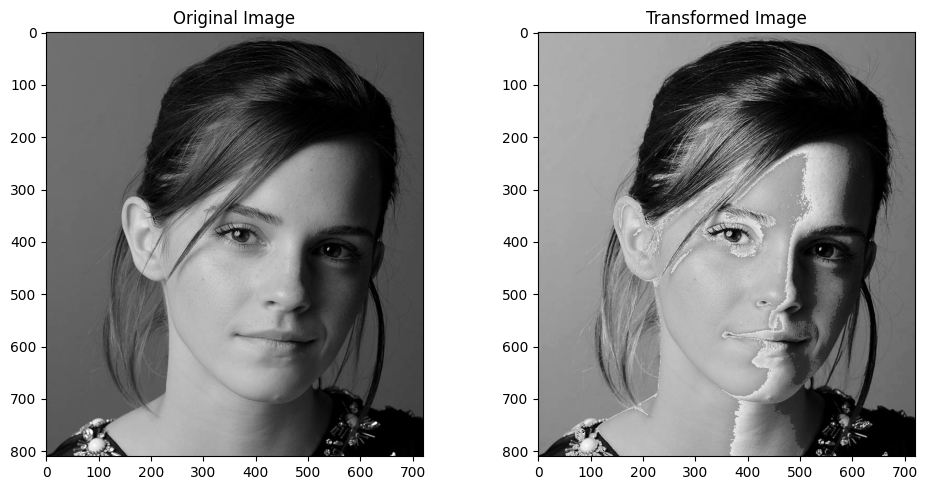

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def piecewise_linear_transform(image, breakpoints, slopes):
    
    # Create a lookup table for the transformation
    lookup_table = np.zeros(256, dtype=np.uint8)
    
    for i in range(len(breakpoints) - 1):
        start, end = breakpoints[i], breakpoints[i+1]
        slope = slopes[i]
        lookup_table[start:end] = np.clip(np.arange(start, end) * slope, 0, 255)
    
    # Apply the transformation using the lookup table
    transformed_image = cv2.LUT(image, lookup_table)
    print(lookup_table)
    return transformed_image

# Load an example image
image_path = "D:\semester 5\\assignment 1\emma.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the piecewise transformation parameters
breakpoints = [0, 50, 150, 255]
slopes = [1, 1.55, 1]

# Apply the piecewise linear transformation
transformed_image = piecewise_linear_transform(original_image, breakpoints, slopes)

# Display the original and transformed images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image")

plt.tight_layout()
plt.show()

Quesetion 2

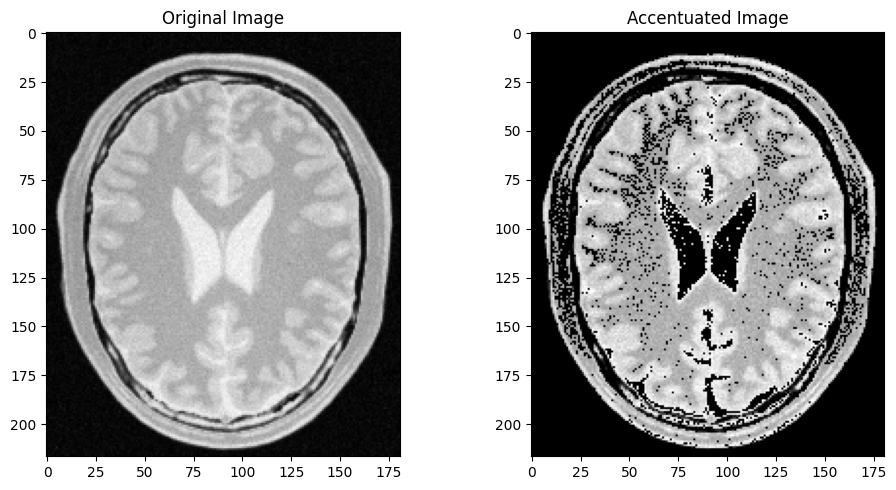

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def piecewise_linear_transform(image, gray_range, white_range):
    """
    Apply piecewise linear intensity transformation to accentuate gray and white matter.
    
    Args:
        image (numpy.ndarray): Input image.
        gray_range (tuple): Intensity range for gray matter (e.g., (min_gray, max_gray)).
        white_range (tuple): Intensity range for white matter (e.g., (min_white, max_white)).
        
    Returns:
        numpy.ndarray: Transformed image.
    """
    min_gray, max_gray = gray_range
    min_white, max_white = white_range
    
    # Create a lookup table for the transformation
    lookup_table = np.zeros(256, dtype=np.uint8)
    
    # Darken gray matter
    lookup_table[min_gray:max_gray+1] = np.linspace(0, min_gray, max_gray - min_gray + 1)
    
    # Brighten white matter
    lookup_table[min_white:max_white+1] = np.linspace(min_white, 255, max_white - min_white + 1)
    
    # Apply the transformation using the lookup table
    transformed_image = cv2.LUT(image, lookup_table)
    return transformed_image

# Load your medical image (replace with your image path)
image_path = "D:\semester 5\\assignment 1\BrainProtonDensitySlice9.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the intensity ranges for gray and white matter
gray_intensity_range = (80, 140)  # Adjust these values based on your image
white_intensity_range = (160, 220)  # Adjust these values based on your image

# Apply the piecewise linear transformation
accentuated_image = piecewise_linear_transform(original_image, gray_intensity_range, white_intensity_range)

# Display the original and accentuated images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(accentuated_image, cmap='gray')
plt.title("Accentuated Image")

plt.tight_layout()
plt.show()
